In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


pd.options.mode.chained_assignment = None

df = pd.read_excel('StockData.xlsx', sheet_name='Data(2330)')
print(df)

          DATE     OP   MAXP   MINP    CLP    PERC        VOL    MA5    MA10  \
0     20131021  111.0  111.5  109.5  110.0  0.0000  41327.324  108.0  106.45   
1     20131022  110.0  111.5  109.5  111.5  1.3636  39837.172  108.9  107.30   
2     20131023  111.0  111.5  110.0  111.0 -0.4484  23057.730  109.9  107.90   
3     20131024  109.0  110.0  108.5  110.0 -0.9009  21570.336  110.5  108.40   
4     20131025  108.5  109.0  106.5  107.0 -2.7273  37244.500  109.9  108.45   
...        ...    ...    ...    ...    ...     ...        ...    ...     ...   
2444  20231018  549.0  549.0  540.0  540.0 -1.9964  28848.123  547.8  539.20   
2445  20231019  540.0  548.0  540.0  546.0  1.1111  26999.256  547.0  540.90   
2446  20231020  549.0  556.0  546.0  556.0  1.8315  49143.934  547.6  544.50   
2447  20231023  552.0  553.0  543.0  544.0 -2.1583  24172.637  547.4  546.10   
2448  20231024  543.0  546.0  540.0  544.0  0.0000  14983.000  546.0  547.30   

        MA20  ...  ZIG5  ZIGTRN   KDHL 

In [3]:
# ZIG10
CLP = df.CLP
CLPUD = df.CLPUD
ZIG5 = df.ZIG5
ZIGTRN = df.ZIGTRN

# OSCTRN
OSCUD = df.OSCUD
OSCTRN = df.OSCTRN

In [5]:
# ZIG10
zig_perc = 0.1

lclp = CLP[0]
l = 0
trnclp = CLP[0]
trnpt = 0
flg = CLPUD[1] # flg -1: D, 1: U

for i in range(1, len(CLPUD)):
    ZIGTRN[i] = 0
    if i == len(CLPUD) - 1:
        for j in range(l, i + 1):
            ZIG5[j] = round(lclp + ((j - l) * (CLP[i] - lclp) / (i - l)), 2)

    if CLPUD[i] == 0:
        continue
    
    if flg == -1 and trnclp > CLP[i]:
        trnclp = CLP[i]
        trnpt = i
    if flg == 1 and trnclp < CLP[i]:
        trnclp = CLP[i]
        trnpt = i
    
    perc = abs((CLP[i] - trnclp) / trnclp)
    
    if perc >= zig_perc:
        if flg == 1:
            ZIGTRN[l] = 1
        else:
            ZIGTRN[l] = -1
        for j in range(l, trnpt):
            ZIG5[j] = round(lclp + ((j - l) * (trnclp - lclp) / (trnpt - l)), 2)
        
        if flg == 1: flg = -1
        else: flg = 1
        lclp = CLP[trnpt]
        l = trnpt
        trnclp = CLP[i]
        trnpt = i

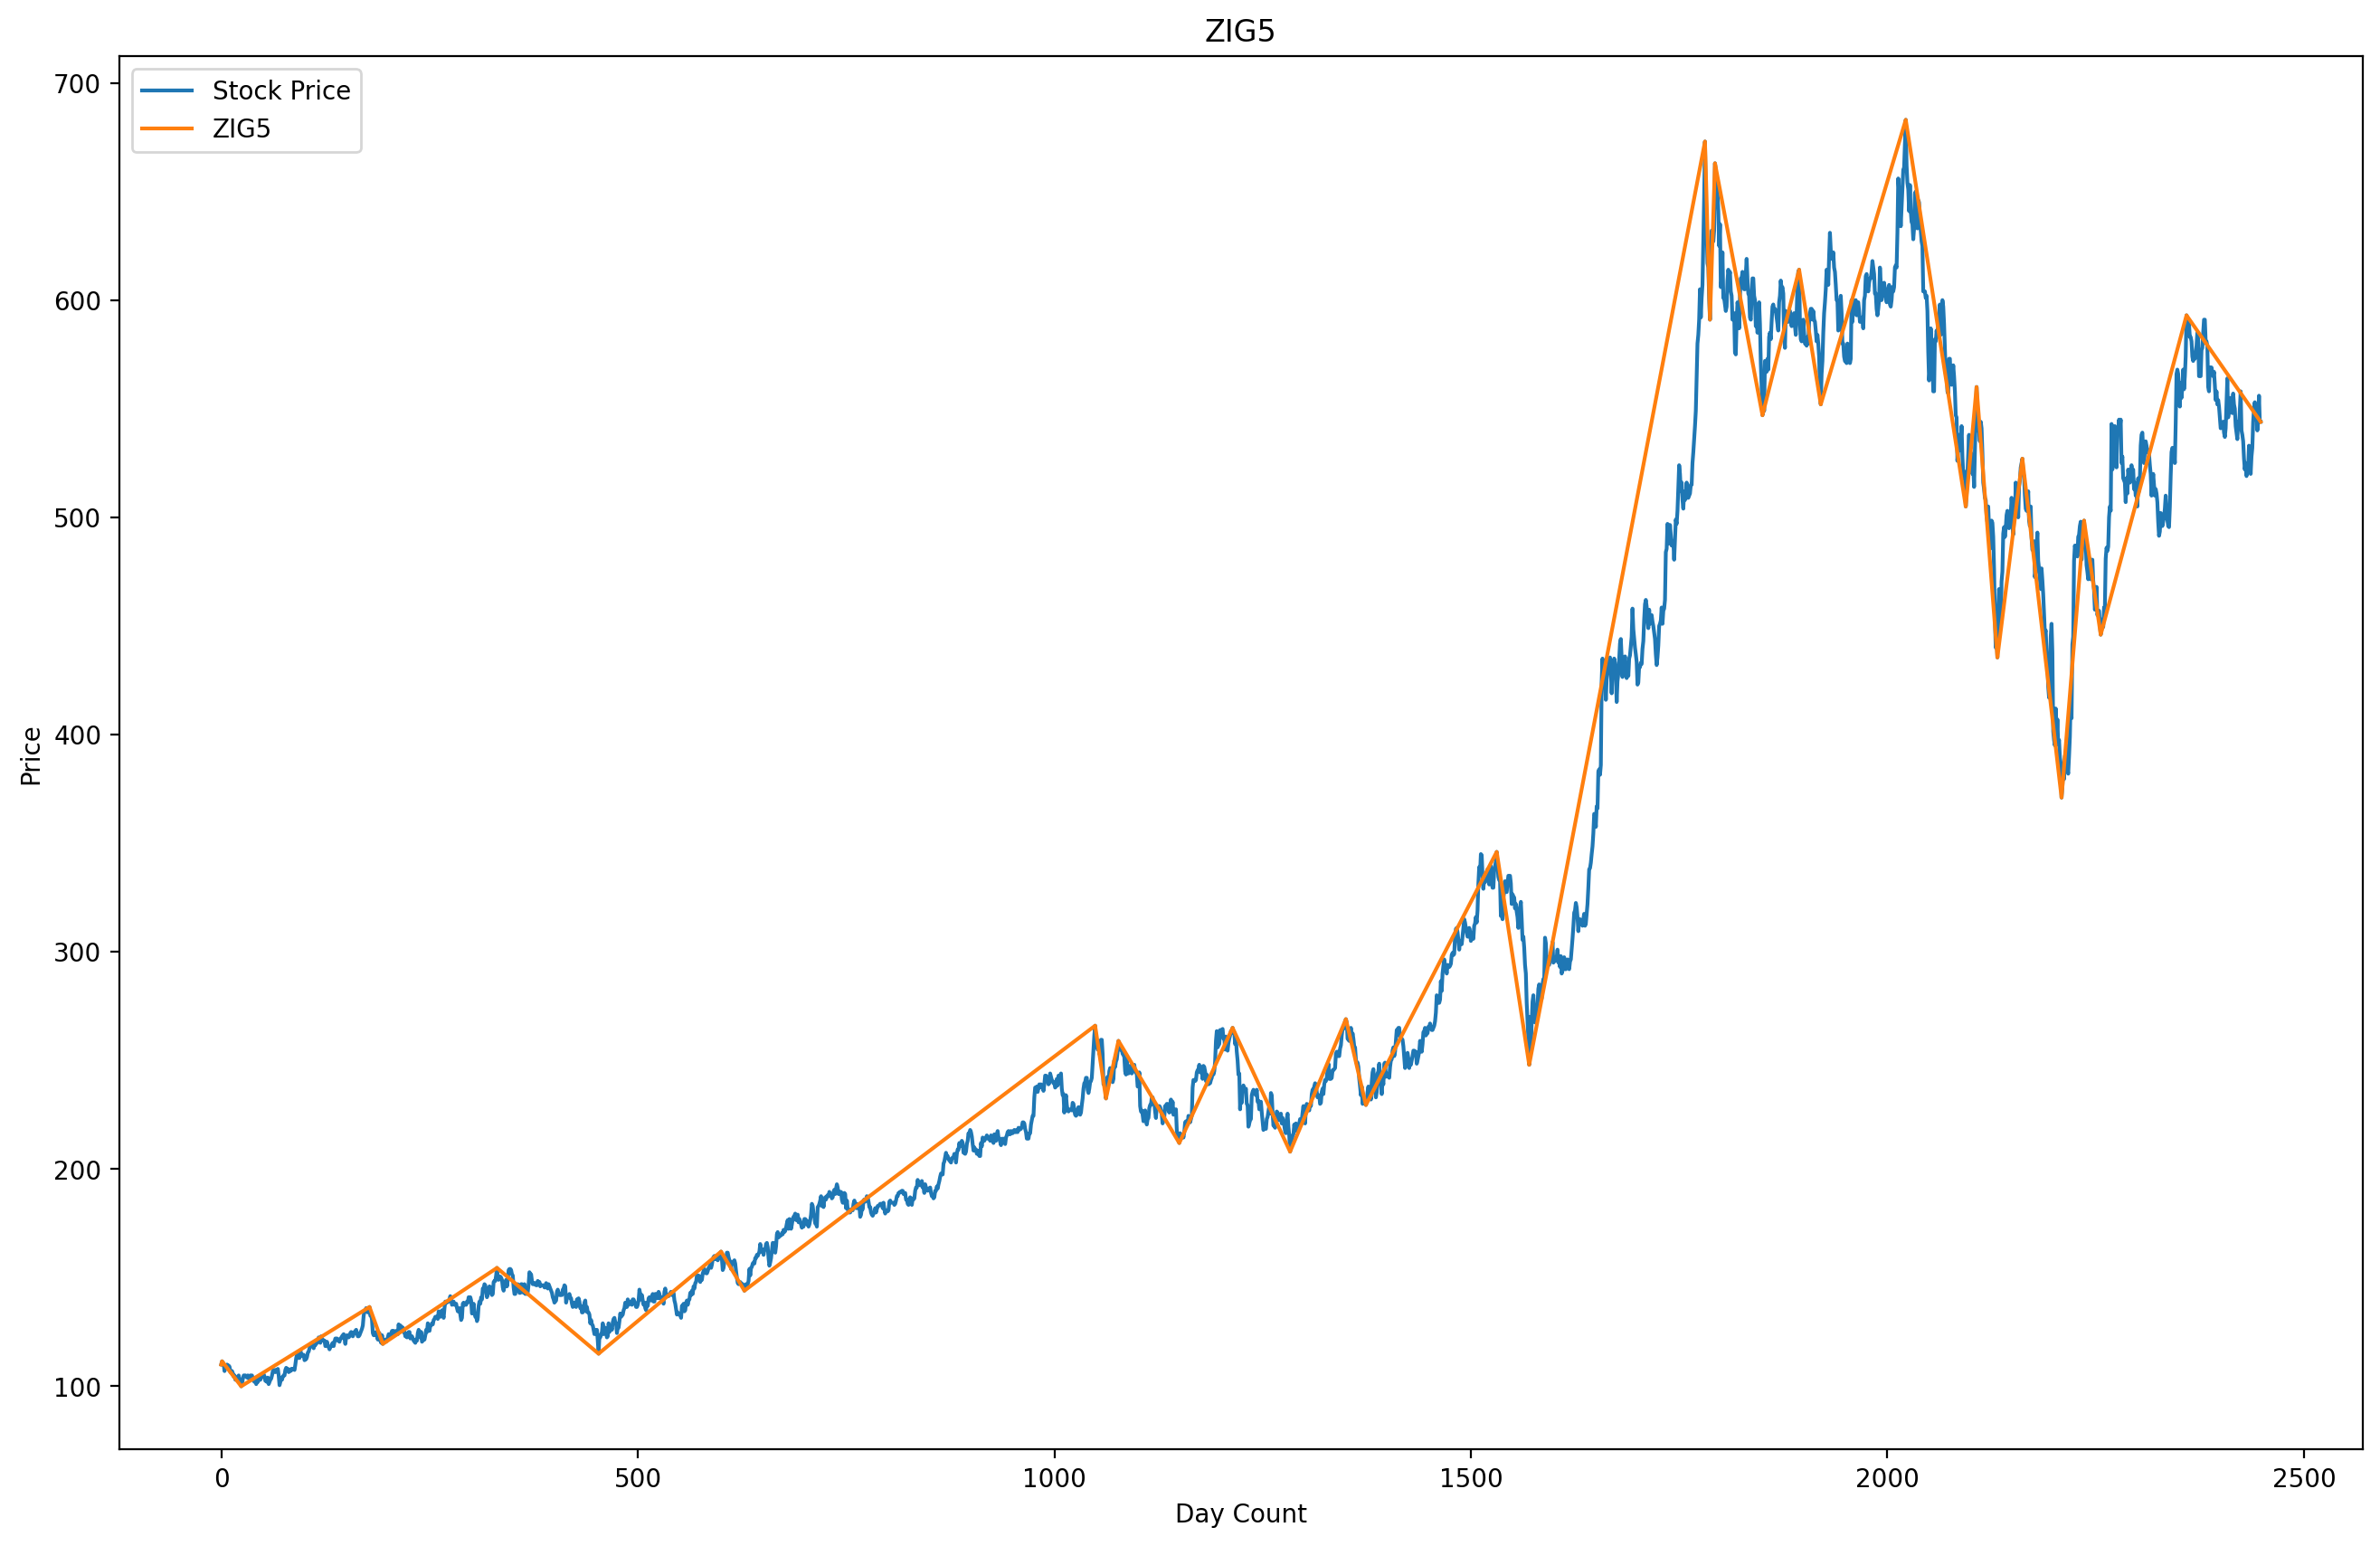

In [8]:
plt.figure(figsize=(16, 10), dpi=200)
plt.plot(df.CLP[:])
plt.plot(df.ZIG5[:])
plt.title('ZIG5')
plt.ylabel('Price')
plt.xlabel('Day Count')
plt.legend(['Stock Price', 'ZIG5'], loc='upper left')
plt.show()

In [5]:
#OSCTRN
flg = OSCUD[1]

for i in range(1, len(OSCUD)):
    OSCTRN[i] = 0
    if OSCUD[i] == 0:
        continue
    if flg != OSCUD[i]:
        if flg == 1:
            OSCTRN[i] = -1
        else:
            OSCTRN[i] = 1
        flg = OSCUD[i]

In [6]:
df.to_csv('StockData.csv', index=False, encoding='utf-8')